In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melbourne-housing-snapshot/melb_data.csv


In [2]:
import seaborn as sns,matplotlib.pyplot as plt
pd.set_option('display.max_columns', 50)
sns.set_theme()

In [3]:
df=pd.read_csv('/kaggle/input/melbourne-housing-snapshot/melb_data.csv')

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
orginal_df=df.copy()

In [6]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [7]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

# Target variable

Skewness of our target - Price :  2.239624312529873
Kurtosis of our target - Price :  9.874338885906042


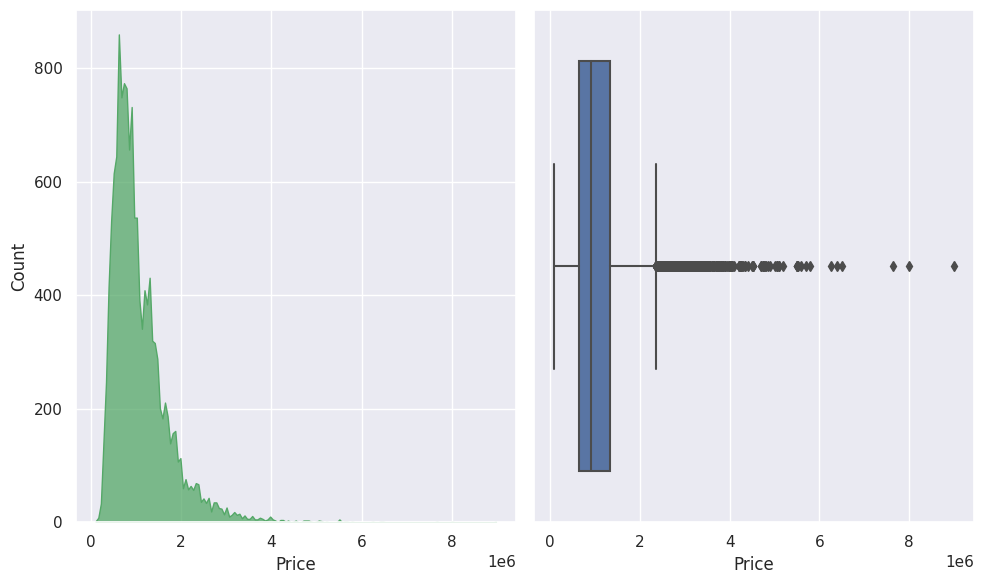

In [10]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
sns.histplot(data=df,x='Price',element='poly',color='g',ax=ax[0])
sns.boxplot(data=df,x='Price',ax=ax[1])
plt.tight_layout()
print('Skewness of our target - Price : ',df['Price'].skew())
print('Kurtosis of our target - Price : ',df['Price'].kurtosis())

<Axes: >

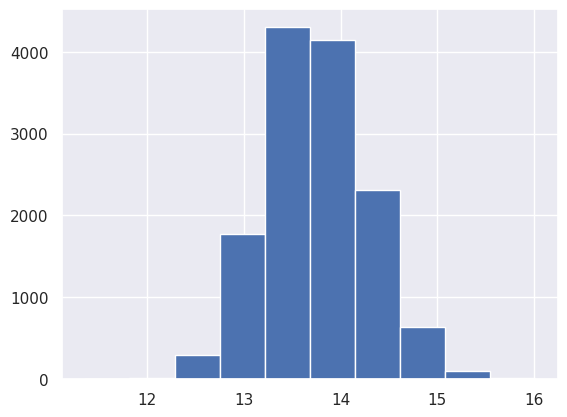

In [11]:
np.log(df['Price']).hist()

# Analysis of features

In [12]:
object_df=df.select_dtypes('object')

In [13]:
object_df.head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra,Northern Metropolitan
2,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra,Northern Metropolitan
3,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,Yarra,Northern Metropolitan
4,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,Yarra,Northern Metropolitan


In [14]:
object_df.describe().T

,count,unique,top,freq
Suburb,13580,314,Reservoir,359
Address,13580,13378,36 Aberfeldie St,3
Type,13580,3,h,9449
Method,13580,5,S,9022
SellerG,13580,268,Nelson,1565
Date,13580,58,27/05/2017,473
CouncilArea,12211,33,Moreland,1163
Regionname,13580,8,Southern Metropolitan,4695


In [15]:
suburbs_avg_price=df.groupby('Suburb').Price.mean().round(0)
top_20_suburbs=df.groupby('Suburb').Price.mean().nlargest(20).index

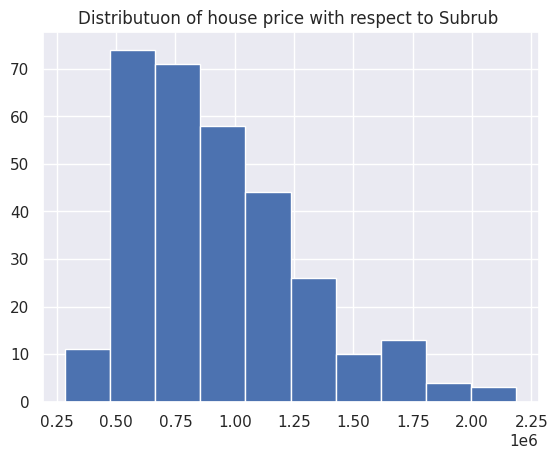

In [16]:
suburbs_avg_price.hist()
plt.title('Distributuon of house price with respect to Subrub ');

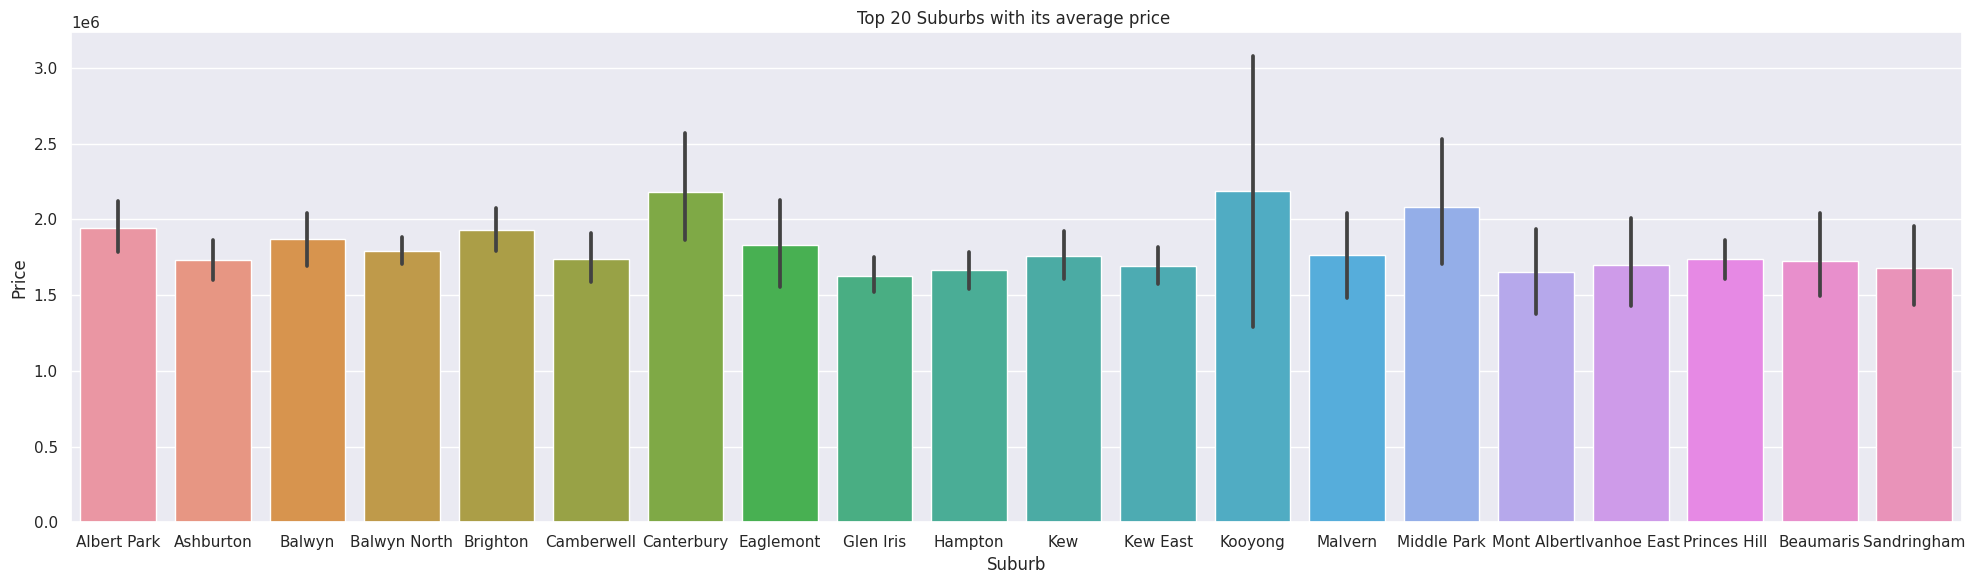

In [17]:
plt.figure(figsize=(20,6))
sns.barplot(data=df[df['Suburb'].isin(top_20_suburbs)],x='Suburb',y='Price',)
plt.title('Top 20 Suburbs with its average price ')
plt.tight_layout();

In [18]:
#Method 
#S - property sold; SP - property sold prior; PI - property passed in; VB - vendor bid SA - sold after auction;

#Type 
# h- home u - unit d - duplex

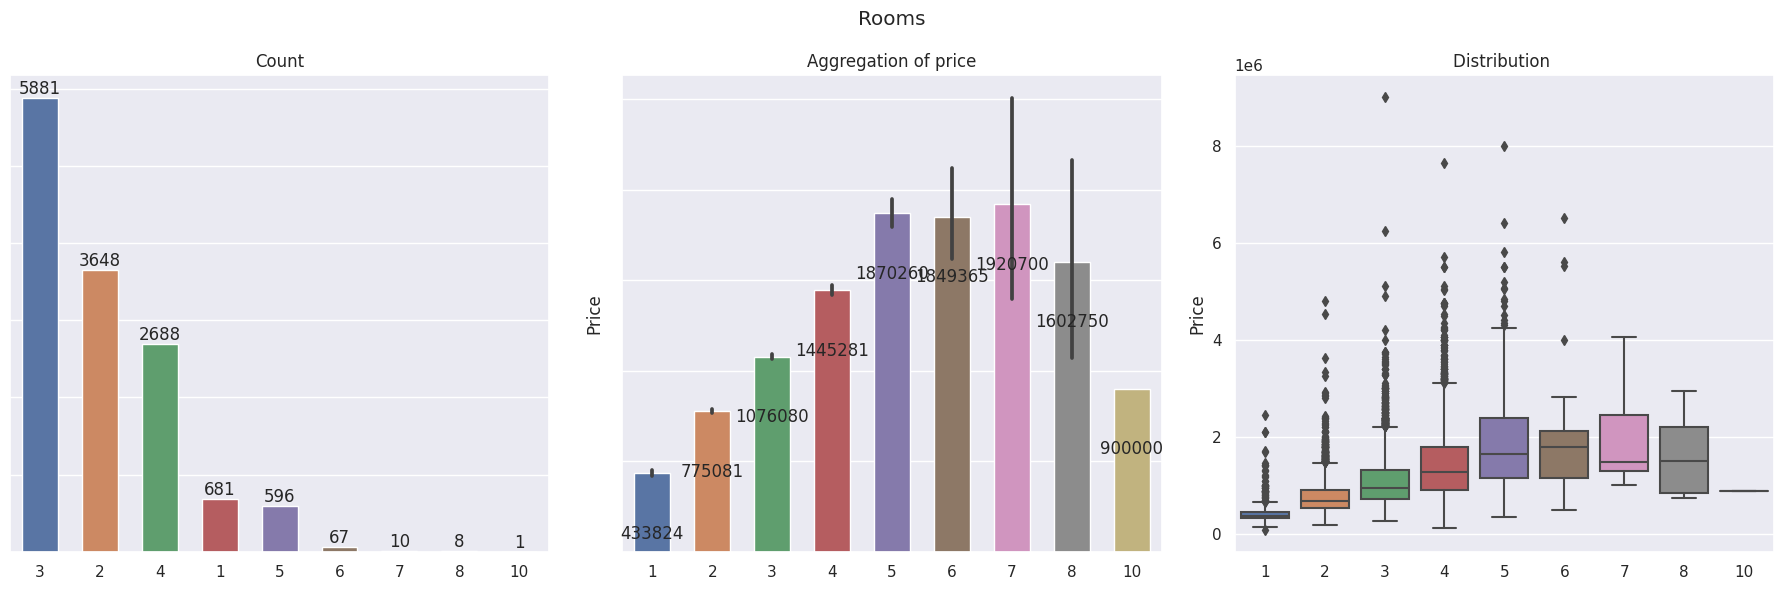

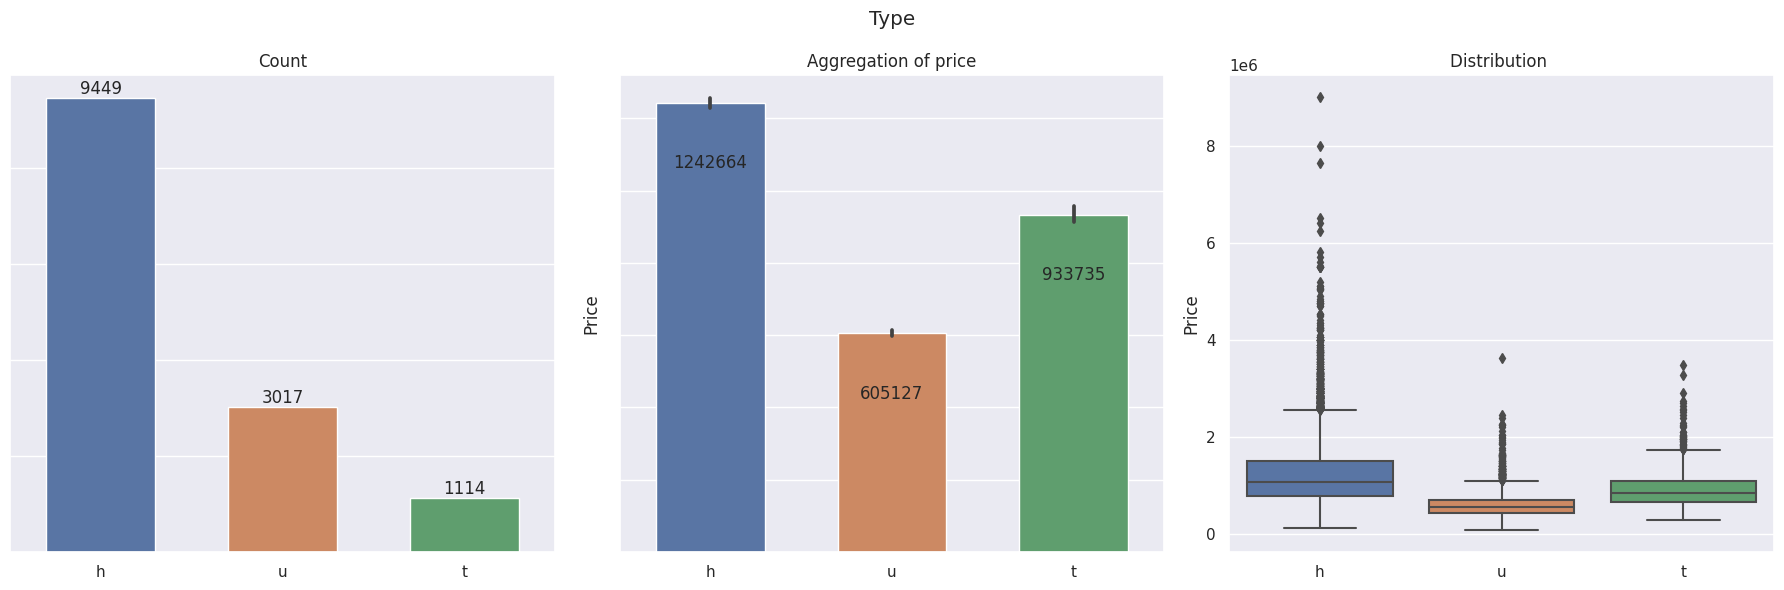

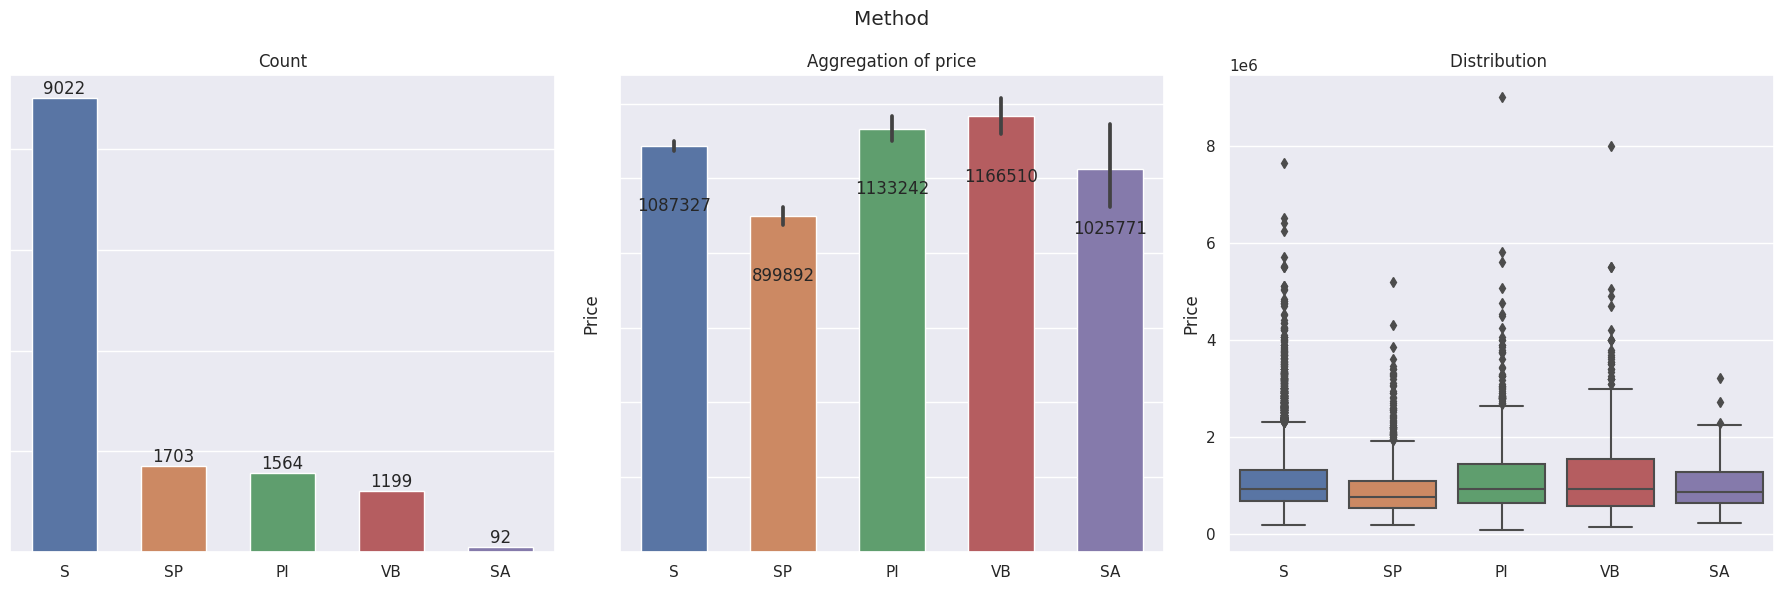

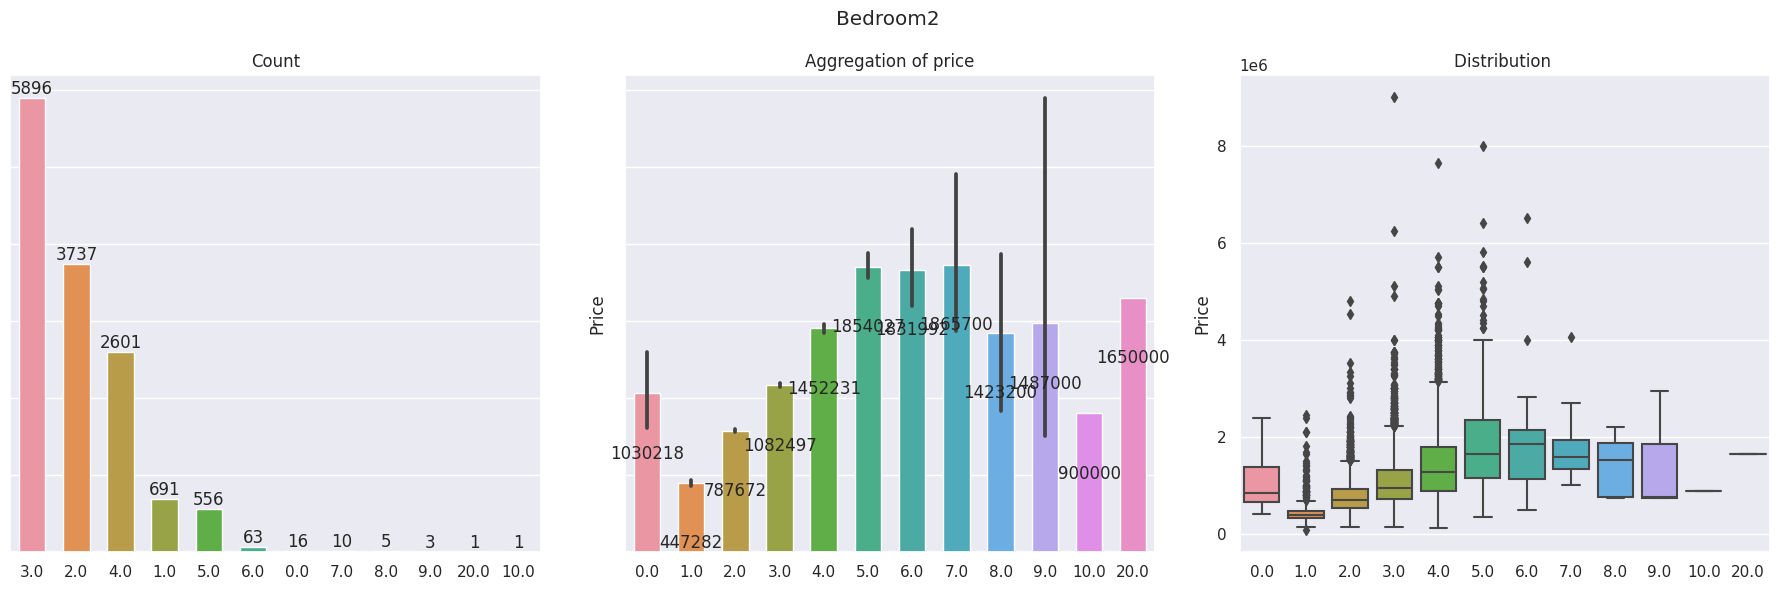

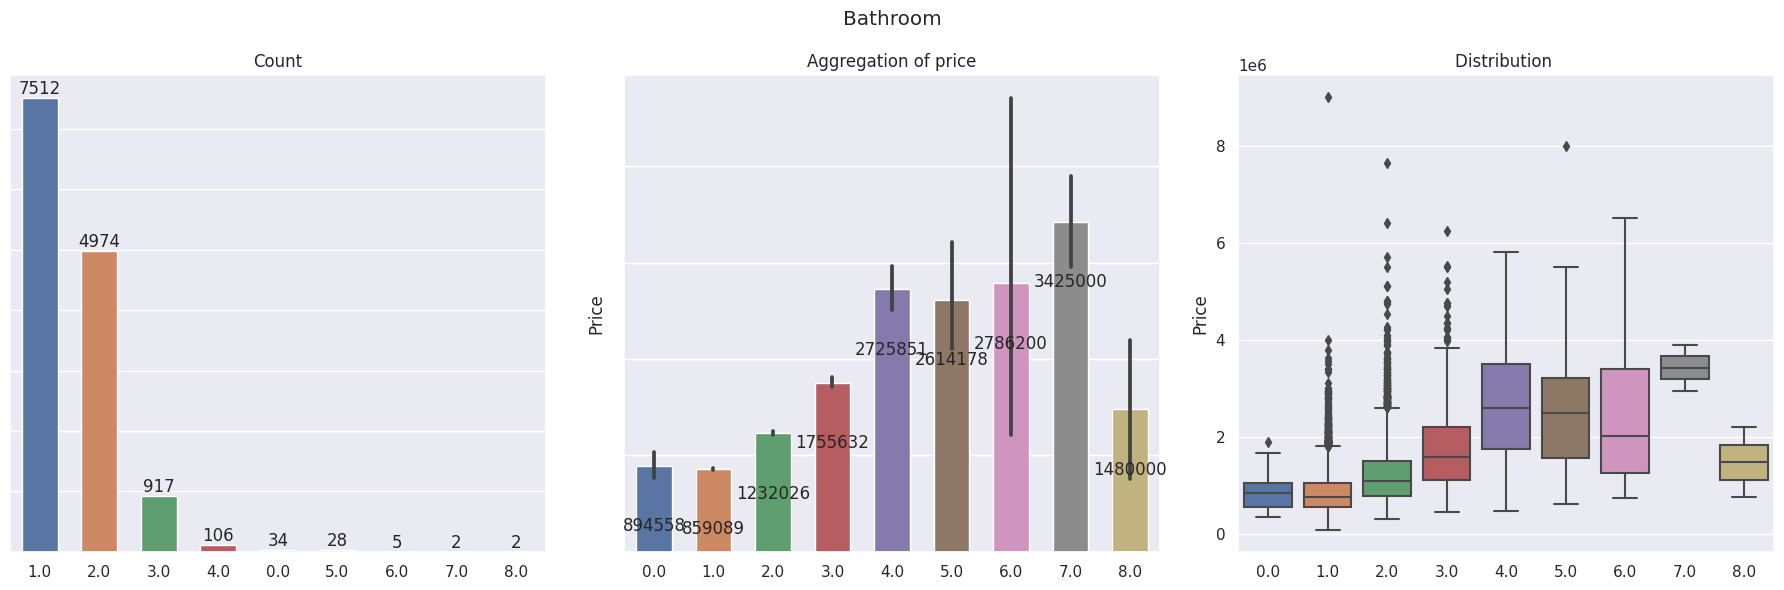

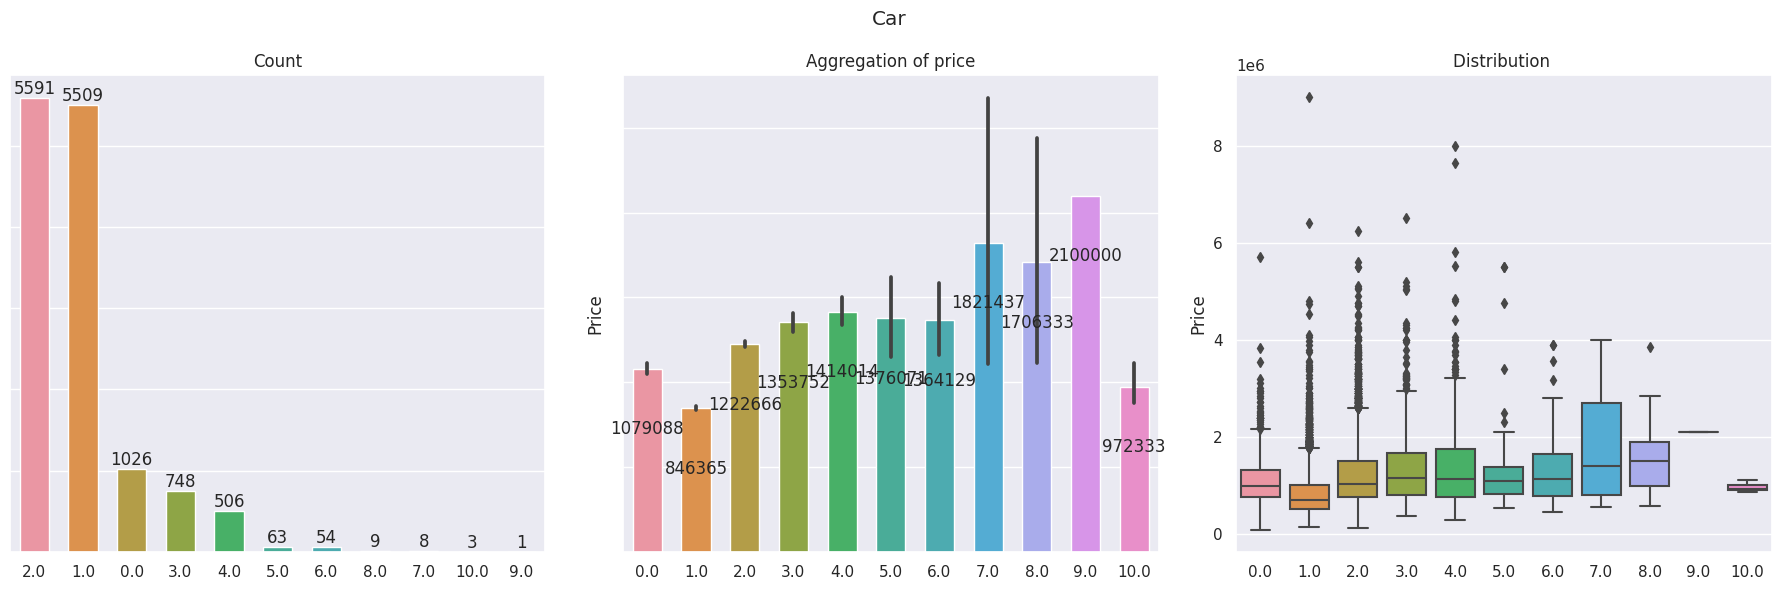

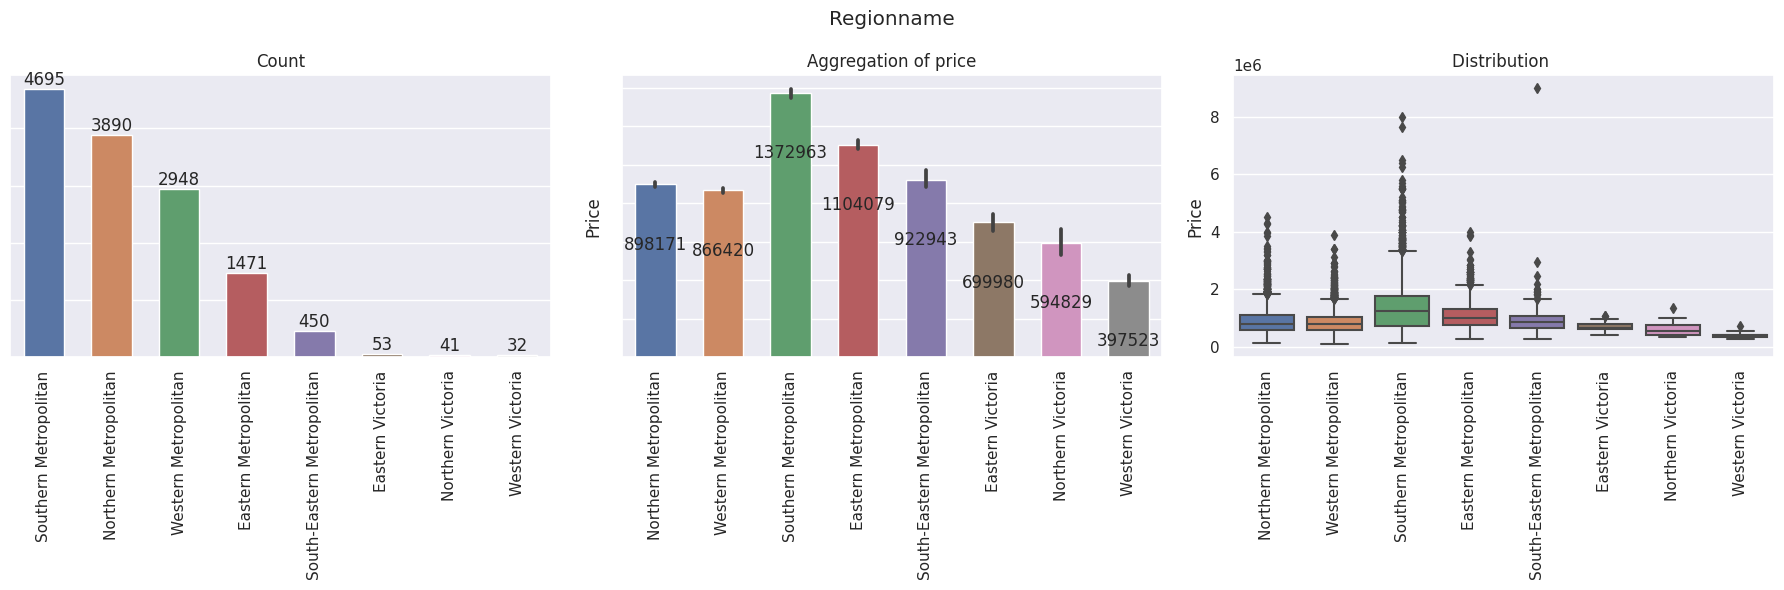

In [19]:
cat_cols=list(df.nunique()[(df.nunique().values<20)&(df.nunique().values>2)].index)
def plot_categorical_cols(column):
    fig,ax=plt.subplots(1,3,figsize=(18,6))
    
    count_values=df[column].value_counts(ascending=False).index
    fig_=sns.countplot(data=df,x=column,ax=ax[0],order=count_values,width=0.6)
    fig_.bar_label(container=fig_.containers[0])
    fig_.set(yticklabels=[],ylabel=None,xlabel=None,title=f'Count')
    
    img=sns.barplot(data=df,x=column,y='Price',ax=ax[1],width=0.6)
    img.bar_label(container=img.containers[0],fmt='%d',label_type='edge',padding=-50)
    img.set(yticklabels=[],xlabel=None,title=f'Aggregation of price')
    
    fig_1=sns.boxplot(data=df,x=column,y='Price',ax=ax[2])
    fig_1.set(xlabel=None,title=f'Distribution ')
    if column=='Regionname':
        fig_.set_xticklabels(fig_.get_xticklabels(),rotation=90)
        img.set_xticklabels(img.get_xticklabels(),rotation=90)
        fig_1.set_xticklabels(fig_1.get_xticklabels(),rotation=90)
    fig.suptitle(column)
    plt.tight_layout()
for column in cat_cols:
    plot_categorical_cols(column)


In [20]:
import plotly.express as px
fig = px.scatter_mapbox(df, 
                        lat="Lattitude", 
                        lon="Longtitude",
                        hover_data=['CouncilArea', 'Regionname'],
                        color='Price',
                        zoom=9, 
                        height=800,
                        width=800,mapbox_style="open-street-map")

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

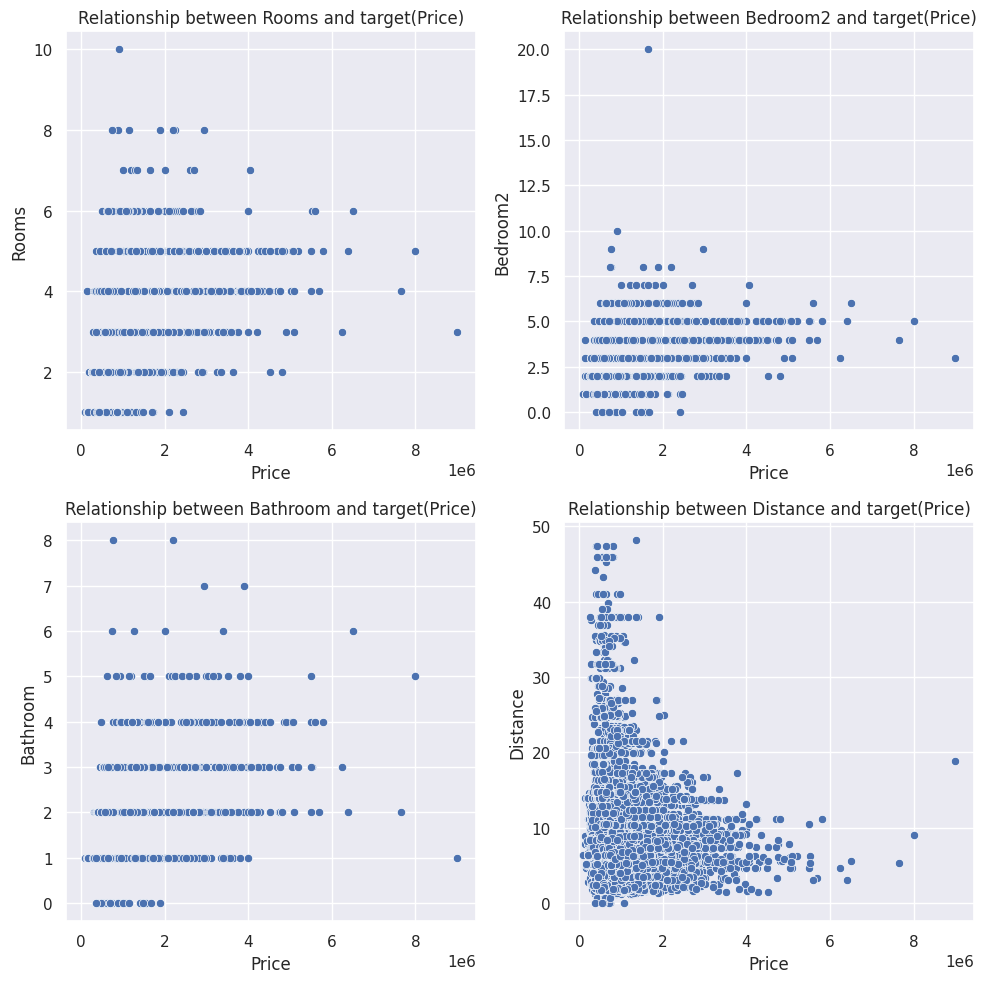

In [21]:
fig,axs=plt.subplots(nrows=2,ncols=2
                     ,figsize=(10,10))
for index,col in enumerate(['Rooms','Bedroom2','Bathroom','Distance']):
    img=sns.scatterplot(data=df,x='Price',y=col,ax=axs[index//2,index%2],)
    img.set(title=f'Relationship between {col} and target(Price)')
plt.tight_layout()
plt.show()

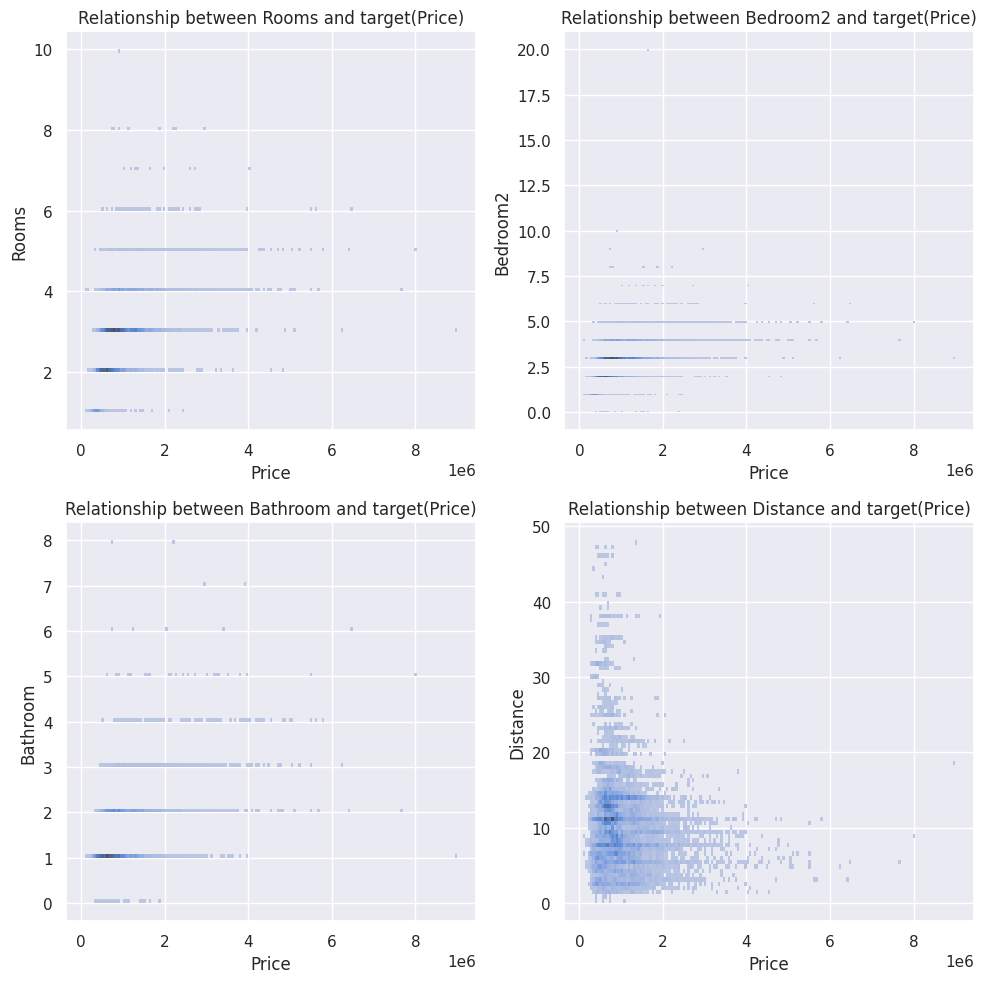

In [22]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,10))
for index,col in enumerate(['Rooms','Bedroom2','Bathroom','Distance']):
    img=sns.histplot(data=df,x='Price',y=col,ax=axs[index//2,index%2],)
    img.set(title=f'Relationship between {col} and target(Price)')
plt.tight_layout()
plt.show()

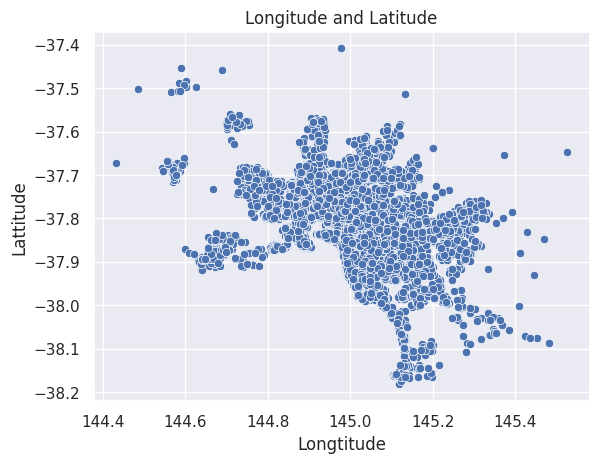

In [23]:
sns.scatterplot(data=df,x='Longtitude',y='Lattitude').set_title('Longitude and Latitude');


*   We can drop Address  column as it doesnt add any values to our target variable
  
*   We can encode "Type" column with Ordinal encoding house -1 duplex -2  unit -3

*   We can drop house method,as it wont have any influence house's price




In [24]:
!pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 84.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [25]:

from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

In [26]:
df2=df.copy()
x=df2.drop(columns=['Price'])
y=df2[['Price']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [27]:
class FeatureExtractor(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.numerical_features_=None
        self.categorical_features_=None
        
    def fit(self,X,y=None):
        df1=X.copy()
        df1=self.create_features(df1)
    
        self.numerical_features_=df1.select_dtypes(include=['int','float']).columns.tolist()
        self.categorical_features_=df1.select_dtypes(include=['object','category']).columns.tolist()
        return self
        
    def transform(self,X):
        
        df1=X.copy()

        df3=self.create_features(df1)
        
        return df3
    
    def create_features(self,df1):
        
        df1.drop(columns=[ 'Address','Method','Postcode','CouncilArea'],inplace=True,errors='ignore')
    
        #Mapping House Type columns 
        if 'Type' in df1.columns:
            type_dict={'h':0,'u':1,'t':2}
            if (['h', 'u', 't']==df1['Type'].unique()).all():
                df1['Type']=df1['Type'].apply(lambda x:type_dict[x])
            else:
                print(f"New house type found {df1['Type'].unique()}")
                df1['Type']=df1['Type'].apply(lambda x: type_dict[x])
        else:
            #From above visualisations, we can identify that 80% of data is house
            df.loc[:,'Type']=0
        
        df1['Distance_log']=np.log(df1['Distance'])
    
        df1.drop(columns=['YearBuilt','Date','Distance'],inplace=True,errors='ignore') 
        
        df1.replace([np.inf,-np.inf],0,inplace=True)

        return df1


In [28]:

feature_extractor=FeatureExtractor()

In [29]:
xe=feature_extractor.fit(x_train)

In [30]:
#processing only our necessary columns
numerical_columns=xe.numerical_features_
categorical_columns=xe.categorical_features_
numerical_columns.remove('BuildingArea')


In [31]:
#Combining imputer and encoders
numeric_columns_processing=Pipeline([('imputer_numeric',SimpleImputer(strategy='median'))])
categoric_columns_processing=Pipeline([('imputer_categorical',SimpleImputer(strategy='most_frequent')),
                                ('encoder_categorical',TargetEncoder(target_type='continuous'))])
preprocessor=ColumnTransformer([
                  ('categorical',categoric_columns_processing,categorical_columns),
                  ('numerical',numeric_columns_processing,numerical_columns),
                  ('building_area_imputer',KNNImputer(n_neighbors=5),['BuildingArea'])],
                  remainder='drop')



In [32]:
#Building pipeline for all of our process
model=make_pipeline(
    feature_extractor,
    preprocessor,
    RandomForestRegressor(
                          n_estimators=300,
                          max_features='sqrt',
                          n_jobs=-1,
                          oob_score=True,
                          random_state=2)
    )

In [33]:
df2=orginal_df.copy()
x=df2.drop(columns=['Price'])
y=df2[['Price']]

#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6,random_state=2)
model.fit(x_train,y_train)


Pipeline(steps=[('featureextractor', FeatureExtractor()),
                ('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer_categorical',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder_categorical',
                                                                   TargetEncoder(target_type='continuous'))]),
                                                  ['Suburb', 'SellerG',
                                                   'Regionname']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer_numeric',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Rooms', 'Type', 'Bedroom2',
                                                   'Bathroom', 'Car',
                                                   'Landsize', 'Lattitude',
                                                   'Longtitude',
                                                   'Propertycount',
                                                   'Distance_log']),
                                                 ('building_area_imputer',
                                                  KNNImputer(),
                                                  ['BuildingArea'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features='sqrt', n_estimators=300,
                                       n_jobs=-1, oob_score=True,
                                       random_state=2))])

In [34]:
print('oob_score:',model[2].oob_score_*100,
    'Accuracy_test_score',model.score(x_test,y_test)*100,
      'MAE',mean_absolute_error(y_test,model.predict(x_test)))

oob_score: 79.83561601835399 Accuracy_test_score 78.14439857419939 MAE 174235.10687694323


In [35]:
output=pd.concat([y_test.reset_index(drop=True),pd.Series(model.predict(x_test).astype(int),name='Predicted_price')],axis=1)

In [36]:
feature_coefficients=pd.DataFrame(index=model[1].feature_names_in_,data=model[2].feature_importances_)

<Axes: >

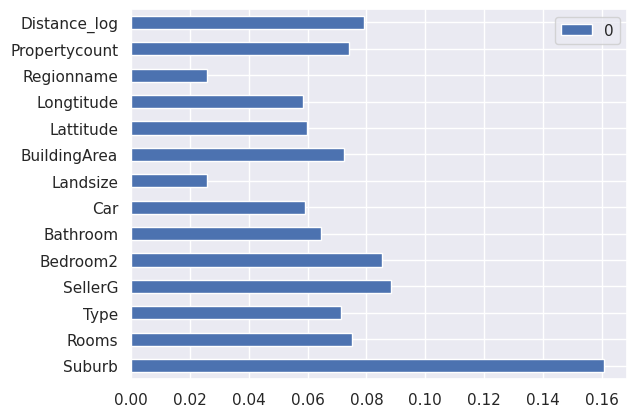

In [37]:
feature_coefficients.plot(kind='barh')